In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

In [66]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [71]:
x=df.iloc[:, [3,4]].values

In [72]:
x.shape

(200, 2)

In [75]:
from sklearn.cluster import KMeans
wcss_list=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

C:\Users\CS-L1-PC02\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


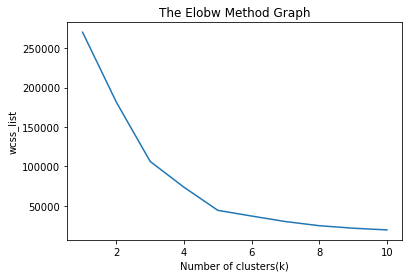

In [76]:
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [79]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict=kmeans.fit_predict(x)

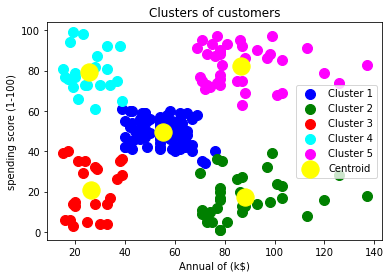

In [80]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') 
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual of (k$)')
mtp.ylabel('spending score (1-100)')
mtp.legend()
mtp.show()